In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
salary_data=pd.read_csv('ds_salaries.csv')
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
salary_data.shape

(3755, 11)

In [5]:
salary_data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [29]:
# On cherche à représenter ici la distribution du nombre de la taille des entreprises
company_s = salary_data.groupby('company_size').size().reset_index()
company_s.columns=['company_size','number']
company_s.head()

,company_size,number
0,L,454
1,M,3153
2,S,148


([<matplotlib.patches.Wedge at 0x7f4b2a634490>,
 [Text(1.0215981211725451, 0.4078446748662119, 'L'),
  Text(-1.0641481051577097, -0.2785476804592998, 'M'),
  Text(1.0915780877709766, -0.13585756621645373, 'S')],
 [Text(0.5572353388213881, 0.22246073174520647, '12.09%'),
  Text(-0.5804444209951143, -0.15193509843234532, '83.97%'),
  Text(0.59540622969326, -0.07410412702715656, '3.94%')])

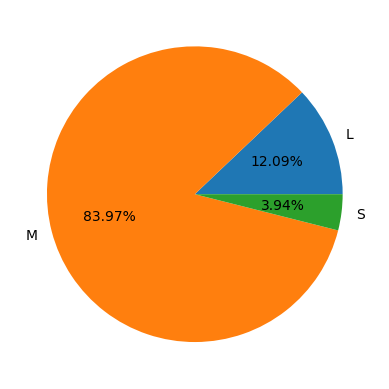

In [30]:
plt.pie(x=company_s['number'], labels=company_s['company_size'], autopct='%.2f%%')

In [38]:
# On s'interesse maintenant à ce qui diffère au niveau salarial pour un employé qui d'une petite
#ou d'une moyenne ou d'une grande entreprise

# On peut commencer par regarder le salaire moyen au sein de ses entreprises
salary_s=salary_data.groupby('company_size').salary_in_usd.mean().reset_index()
salary_s.info

<bound method DataFrame.info of   company_size  salary_in_usd
0            L  118300.982379
1            M  143130.548367
2            S   78226.682432>

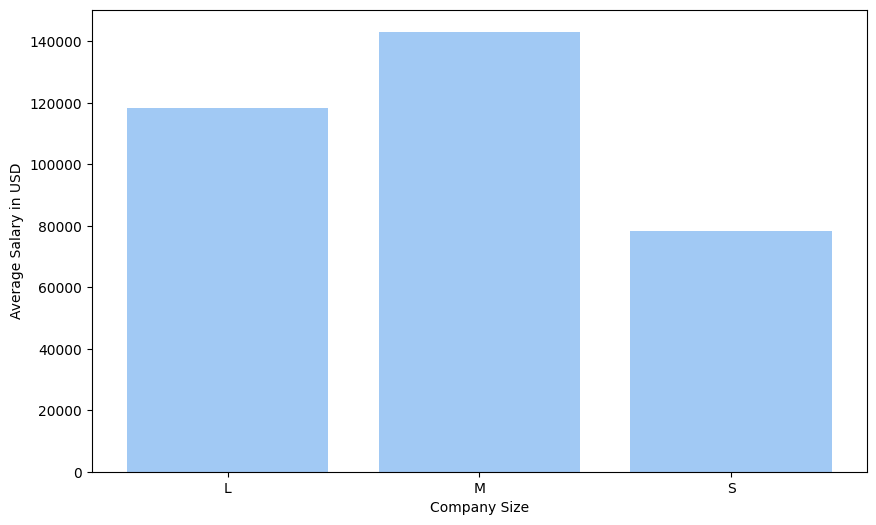

In [54]:
plt.figure(figsize=(10,6))
plt.bar(salary_s['company_size'],salary_s['salary_in_usd'])
plt.xlabel('Company Size', color='Black')
plt.ylabel('Average Salary in USD')
#plt.grid(axis='y')
#plt.yticks([20000,40000,60000,80000,100000,120000,140000]) can loop to make a list with those values
sns.set_palette("muted")
plt.show()

In [59]:
# On constate clairement une différence netre ces 3 tailles d'entreprises
# On effectue le calcul du coeff de correlation linéaire  
print('(Statistic, p-value)')
for col in salary_data:
    print(col)
    print(stats.pearsonr(salary_data[col],salary_data['company_size']))
# EN COURS : probablement faire un Ordinal Encoding 

(Statistic, p-value)
work_year


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None